In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import napari
from PIL import Image
from matplotlib import pyplot as plt

from scribbles_creator import *
from cellpose_data_handler import *

## Define where the images are located and what data to consider

In [ ]:
folder_path = "./imgs/cellpose_train_imgs/"

In [ ]:
mode = "all"
bins = [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]
all_suff = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
suff = all_suff[:5]

## Create predictions/segmentations with Convpaint on the cellpose dataset (wit self-created scribbles)

In [ ]:
layer_list = [0]
scalings = [1, 2]

for img_num in range(0, 10):
    for bin in bins:
        for s in suff:
            pred = pred_cellpose_convpaint(folder_path, img_num, mode=mode, bin=bin, suff=s, layer_list=layer_list, scalings=scalings, save_res=True, show_res=False)

## Analyse the created scribbles and segmentations (perc. labelled vs. acc.) from saved files

In [ ]:
df = pd.DataFrame(columns=['group', 'image', 'ground truth', 'scribbles', 'prediction', 'mode', 'bin', 'perc. labelled', 'accuracy'])
for img_num in range(0, 10):
    for bin in bins:
        for s in suff:
            res = analyse_cellpose_single_file(folder_path, img_num, mode=mode, bin=bin, suff=s, pred_tag="convpaint", show_res=False)
            df = pd.concat([df, res], ignore_index=True)


In [ ]:
df[:5]

In [ ]:
# Save the data frame in a csv file
from datetime import datetime
time_stamp = datetime.now().strftime("%y%m%d%H%M%S")
file_name = f"test_labels_vs_acc_{time_stamp}.csv"
df.to_csv(file_name, index=False)

## Plot

In [48]:
# Load the dataframe from the csv file
file_name = "test_labels_vs_acc_240308165541.csv"
df = pd.read_csv(file_name)
df[:5]

,group,image,ground truth,scribbles,prediction,mode,bin,perc. labelled,accuracy
0,0_all_0.01,./imgs/train/000_img.png,./imgs/train/000_ground_truth.png,./imgs/train/000_scribbles_all_0.01_a.png,./imgs/train/000_convpaint_all_0.01_a.png,all,0.01,0.009179,0.923104
1,0_all_0.01,./imgs/train/000_img.png,./imgs/train/000_ground_truth.png,./imgs/train/000_scribbles_all_0.01_b.png,./imgs/train/000_convpaint_all_0.01_b.png,all,0.01,0.009179,0.874776
2,0_all_0.01,./imgs/train/000_img.png,./imgs/train/000_ground_truth.png,./imgs/train/000_scribbles_all_0.01_c.png,./imgs/train/000_convpaint_all_0.01_c.png,all,0.01,0.009179,0.860099
3,0_all_0.01,./imgs/train/000_img.png,./imgs/train/000_ground_truth.png,./imgs/train/000_scribbles_all_0.01_d.png,./imgs/train/000_convpaint_all_0.01_d.png,all,0.01,0.008669,0.926975
4,0_all_0.01,./imgs/train/000_img.png,./imgs/train/000_ground_truth.png,./imgs/train/000_scribbles_all_0.01_e.png,./imgs/train/000_convpaint_all_0.01_e.png,all,0.01,0.008669,0.633287


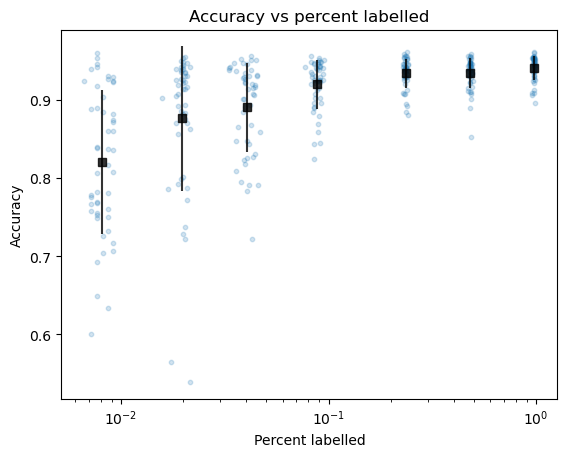

In [49]:
# Plot accuracy vs percent labelled
plt.figure()

# Scatterplot
plt.scatter(df['perc. labelled'], df['accuracy'], alpha=0.2, s=10)
plt.xscale('log')
plt.xlabel('Percent labelled')
plt.ylabel('Accuracy')
plt.title('Accuracy vs percent labelled')

# Grouped plot
# For each picture, take the median; then for each bin, take the mean and standard deviation of the accuracy of all pictures and plot it versurs the percent labelled
df_grouped = df.groupby('bin').agg({'accuracy': ['mean', 'std'], 'perc. labelled': 'mean'}).reset_index()
plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['mean'], yerr=df_grouped['accuracy']['std'], fmt='s', c='black', alpha=0.8)
plt.xscale('log')
plt.xlabel('Percent labelled')
plt.ylabel('Accuracy')
plt.title('Accuracy vs percent labelled')
plt.show()
